In [1]:
import streamlit

import pandas as pd
import numpy as np
import xlrd
import sklearn
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import math
import datetime
import scipy.stats
import itertools

In [2]:
data = pd.read_csv('survey_results_public.csv')


In [3]:
df = data.copy()

In [4]:
df3 = data.copy()

In [5]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [6]:
df = df[['Country', 'EdLevel','YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
df

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
...,...,...,...,...,...
89179,Brazil,"Associate degree (A.A., A.S., etc.)",5,"Employed, full-time;Independent contractor, fr...",NaN
89180,Romania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time;Employed, part-time",NaN
89181,Israel,Something else,NaN,I prefer not to say,NaN
89182,Switzerland,"Secondary school (e.g. American high school, G...",NaN,"Employed, part-time;Student, part-time",NaN


In [7]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [8]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [10]:
df

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0
...,...,...,...,...
89160,Mexico,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",5,28625.0
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,50719.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,64254.0


In [11]:
df['Country'].value_counts()

United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: Country, Length: 165, dtype: int64

In [12]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [13]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440
Norway  

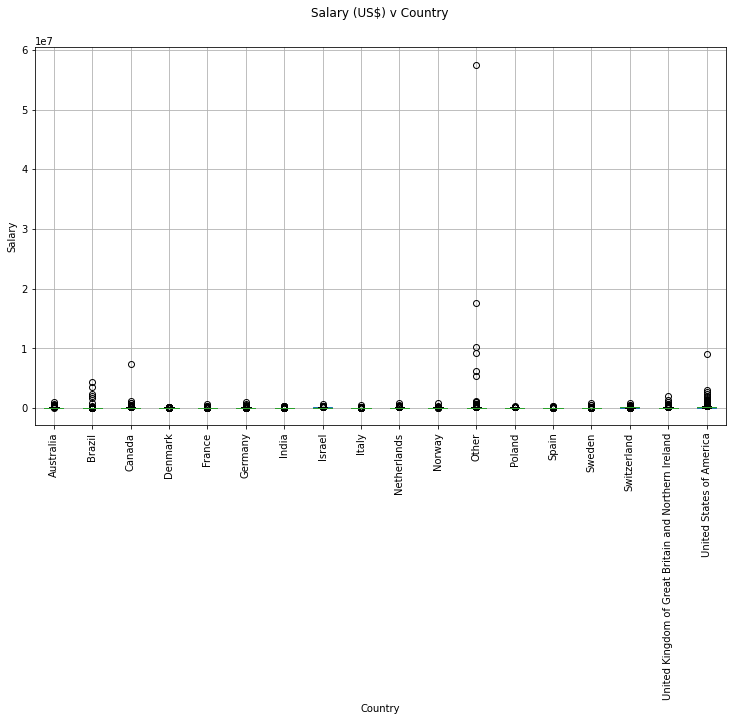

In [14]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0
...,...,...,...,...
89160,Other,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",5,28625.0
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,50719.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,64254.0


In [16]:
df= df[df['Salary']<350000]

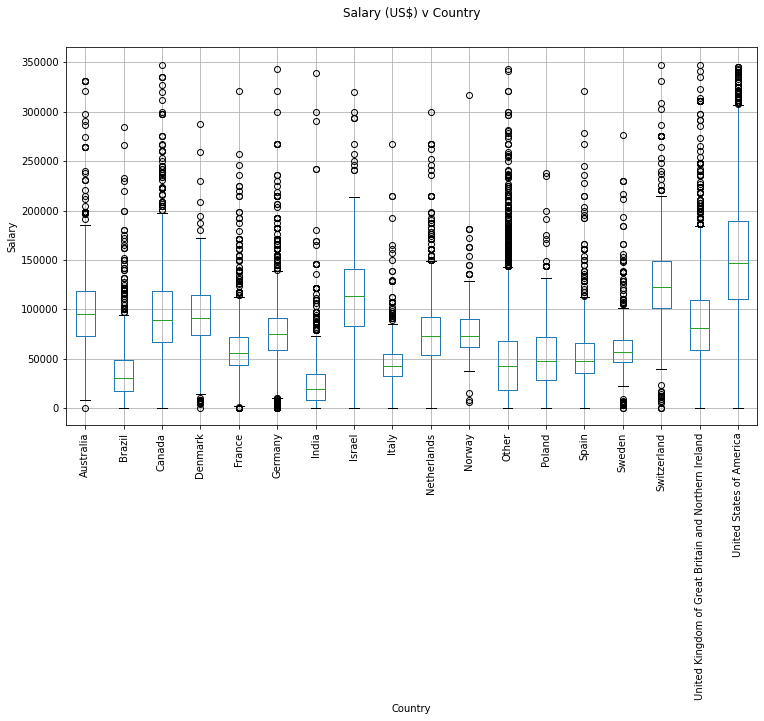

In [17]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [18]:
list_countries = list(df.Country.unique())
list_countries

['United States of America',
 'United Kingdom of Great Britain and Northern Ireland',
 'Other',
 'Australia',
 'Netherlands',
 'Germany',
 'Sweden',
 'France',
 'Spain',
 'Brazil',
 'Italy',
 'Canada',
 'Switzerland',
 'India',
 'Norway',
 'Denmark',
 'Israel',
 'Poland']

In [19]:
clean_df = []

for c in list_countries:
    selected = df[df['Country']==c]
    a = selected.describe()

    Q_1 = a.loc['25%']
    Q_3 = a.loc['75%']
    
    IQR = Q_3 - Q_1

    Q_0 = Q_1 - 1.5*IQR
    Q_4 = Q_3 + 1.5*IQR
    

    clean_df_selected = selected [ (selected['Salary'] >= int(Q_0)) & (selected['Salary'] <= int(Q_4)) ]
    clean_df.append(clean_df_selected)
    
pd_clean_df = pd.concat(clean_df).reset_index(drop=True)
pd_clean_df

,Country,EdLevel,YearsCodePro,Salary
0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
3,United States of America,Some college/university study without earning ...,3,135000.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,80000.0
...,...,...,...,...
37210,Poland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,28711.0
37211,Poland,"Secondary school (e.g. American high school, G...",Less than 1 year,14356.0
37212,Poland,"Secondary school (e.g. American high school, G...",3,21390.0
37213,Poland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,28711.0


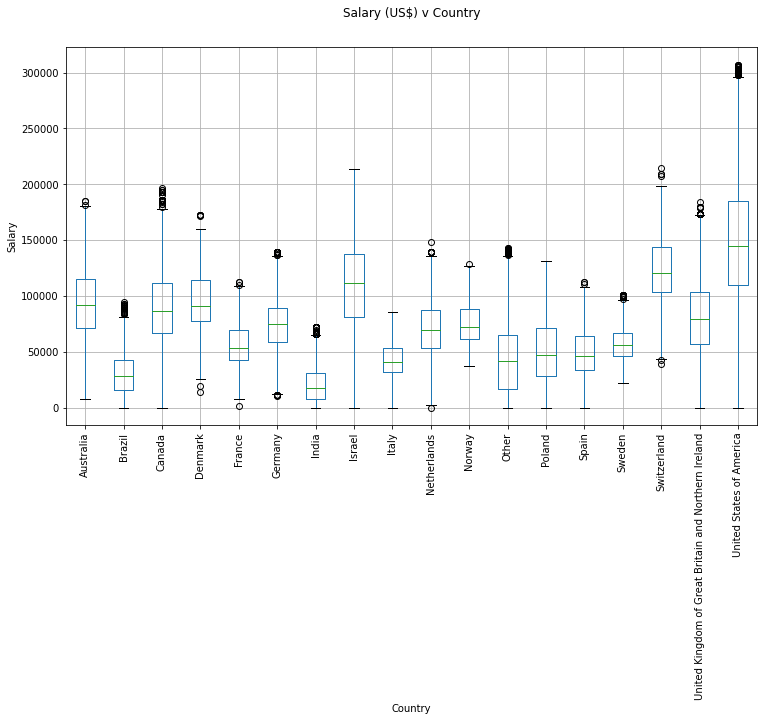

In [20]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))
pd_clean_df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [21]:
df = pd_clean_df

In [22]:
df['YearsCodePro'].unique()

array(['9', '23', '7', '3', 'Less than 1 year', '15', '16', '2', '24',
       '10', '12', '6', '20', '25', '19', '27', '43', '33', '29', '11',
       '14', '13', '4', '28', '5', '8', '42', '17', '21', '26', '31', '1',
       '36', '30', '39', '22', '40', '18', '32', '44', '34', '37', '35',
       '38', 'More than 50 years', '41', '50', '45', '49', '46', '47',
       '48'], dtype=object)

In [23]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 1
    return float(x)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [24]:
df['YearsCodePro'].unique()

array([ 9., 23.,  7.,  3.,  1., 15., 16.,  2., 24., 10., 12.,  6., 20.,
       25., 19., 27., 43., 33., 29., 11., 14., 13.,  4., 28.,  5.,  8.,
       42., 17., 21., 26., 31., 36., 30., 39., 22., 40., 18., 32., 44.,
       34., 37., 35., 38., 50., 41., 45., 49., 46., 47., 48.])

In [25]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Primary/elementary school'], dtype=object)

In [26]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)
    

In [27]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [29]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([17, 16, 11,  0,  9,  5, 14,  4, 13,  1,  8,  2, 15,  6, 10,  3,  7,
       12])

In [30]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris


#random_sample = reciprocal(1, 80).rvs(size=10)

max_depth = [None, 2,4,6,8,10,12]
parameters = {'max_depth': max_depth}

DT = sklearn.tree.DecisionTreeRegressor(criterion='mse',random_state=0)
gs = GridSearchCV(DT, parameters, scoring='neg_mean_squared_error')

gs.fit(X, y.values)
regressor = gs.best_estimator_

y_pred = gs.predict(X)
RMSE_trn = sqrt(mean_squared_error(y_pred, y))
RMSE_trn


c:\users\bezyb\onedrive - campsystems.com\camp files\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\users\bezyb\onedrive - campsystems.com\camp files\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\users\bezyb\onedrive - campsystems.com\camp files\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\users\bezyb\onedrive - campsystems.com\camp files\venv\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `c

37221.55115168385

In [32]:
regressor = gs.best_estimator_


In [33]:
X = np.array([['Italy', 'Master’s degree', 15]])
X

array([['Italy', 'Master’s degree', '15']], dtype='<U15')

In [34]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[ 8.,  2., 15.]])

In [35]:
import pickle

In [36]:
data = {'model': regressor, 'le_country': le_country, 'le_education': le_education}
with open('saved_steps', 'wb') as file:
    pickle.dump(data, file)

In [37]:
with open('saved_steps', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [38]:
y_pred = regressor_loaded.predict(X)
y_pred


c:\users\bezyb\onedrive - campsystems.com\camp files\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([59416.82288031])